### Dataset consists of 4 keys ->

1.) X_jets (Images with 3 channels, and size 125 * 125) <br>
2.) m0 (Mass) <br>
3.) pt (Transverse momentum) <br>
4.) y (Labels) <br>

For this screening task, as asked I am constructing an Autoencoder (Variational) to act upon Jet Images

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import h5py
import numpy as np
filename = '/content/drive/MyDrive/quark-gluon_data-set_n139306.hdf5'

def load_h5(file_name, size):
    # Load the dataset from the HDF5 file
    with h5py.File(file_name, 'r') as f:
        print("The keys are : ", list(f.keys()))
        print("The number of images in dataset : ", len(f['X_jets']))
        print("Dimensions of image tensor : ", f['X_jets'].shape[1:])
        X = np.array(f['X_jets'][:size])
        y = np.array(f['y'][:size])
    return X, y

In [3]:
X, y = load_h5(filename, 10000)

The keys are :  ['X_jets', 'm0', 'pt', 'y']
The number of images in dataset :  139306
Dimensions of image tensor :  (125, 125, 3)


In [4]:
def data_info_getter(X, y):

    print("Max value of intensity along 1st channel : ", np.max(X[:,:,:,0]), "   Min value : ", np.min(X[:,:,:,0]))
    print("Mean intensity value along 1st channel : ", np.mean(X[:,:,:,0]))
    print("Standard Deviation : ", np.std(X[:,:,:,0]), "\n\n")

    print("Max value of intensity along 2nd channel : ", np.max(X[:,:,:,1]), "   Min value : ", np.min(X[:,:,:,1]))
    print("Mean intensity value along 2nd channel : ", np.mean(X[:,:,:,1]))
    print("Standard Deviation : ", np.std(X[:,:,:,1]), "\n\n")


    print("Max value of intensity along 3rd channel : ", np.max(X[:,:,2]), "   Min value : ", np.min(X[:,:,:,2]))
    print("Mean intensity value along 3rd channel : ", np.mean(X[:,:,:,2]))
    print("Standard Deviation : ", np.std(X[:,:,:,2]), "\n\n")

    combined_dataset = X[:,:,:,0] + X[:,:,:,1] + X[:,:,:,2]
    combined_dataset = np.expand_dims(combined_dataset, axis= 3)

    print("Max value of intensity in combined channel image : ", np.max(combined_dataset[:,:,:,0]), "   Min value : ", np.min(combined_dataset[:,:,:,0]))
    print("Mean intensity value in combined channel : ", np.mean(combined_dataset[:,:,:,0]))
    print("Standard Deviation : ", np.std(combined_dataset[:,:,:,0]), "\n\n")
    return

In [5]:
data_info_getter(X,y)

Max value of intensity along 1st channel :  10.088105    Min value :  0.0
Mean intensity value along 1st channel :  7.8410376e-05
Standard Deviation :  0.0038757673 


Max value of intensity along 2nd channel :  9.334086    Min value :  0.0
Mean intensity value along 2nd channel :  4.9682043e-05
Standard Deviation :  0.0021076745 


Max value of intensity along 3rd channel :  0.24324848    Min value :  0.0
Mean intensity value along 3rd channel :  3.119493e-05
Standard Deviation :  0.00051332446 


Max value of intensity in combined channel image :  12.1562605    Min value :  0.0
Mean intensity value in combined channel :  0.0001592877
Standard Deviation :  0.004635658 




In [6]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt


#Plotting functions for the images -->

def plot_fxn(X):

    print("For the first image in the passed data batch -> \n")


    X_sample = X[0]
    print("For the first image among the batch passed : ")
    print("Max value of intensity along 1st channel : ", np.max(X_sample[:,:,0]), "   Min value : ", np.min(X_sample[:,:,0]))
    print("Max value of intensity along 2nd channel : ", np.max(X_sample[:,:,1]), "   Min value : ", np.min(X_sample[:,:,1]))
    print("Max value of intensity along 3rd channel : ", np.max(X_sample[:,:,2]), "   Min value : ", np.min(X_sample[:,:,2]))
    og_plot = plt.imshow(X_sample)


    fig, axs = plt.subplots(1, 3, figsize=(20, 20))

    im1 = axs[0].imshow(X_sample[:,:,0], cmap='viridis', vmin=-0.5, vmax=2.0, interpolation='nearest')
    axs[0].set_title('Track')

    im2 = axs[1].imshow(X_sample[:, :, 1], cmap='viridis', vmin=-0.5, vmax=2.0, interpolation='nearest')
    axs[1].set_title('ECAL')

    im3 = axs[2].imshow(X_sample[:, :,2], cmap='viridis', vmin=-0.5, vmax=2.0, interpolation='nearest')
    axs[2].set_title('HCAL')

    # Add colorbars
    fig.colorbar(im1, ax=axs[0], shrink=0.25)
    fig.colorbar(im2, ax=axs[1], shrink=0.25)
    fig.colorbar(im3, ax=axs[2], shrink=0.25)

    plt.show()

    return None

For the first image in the passed data batch -> 

For the first image among the batch passed : 
Max value of intensity along 1st channel :  0.24925861    Min value :  0.0
Max value of intensity along 2nd channel :  0.1778053    Min value :  0.0
Max value of intensity along 3rd channel :  0.0037489757    Min value :  0.0


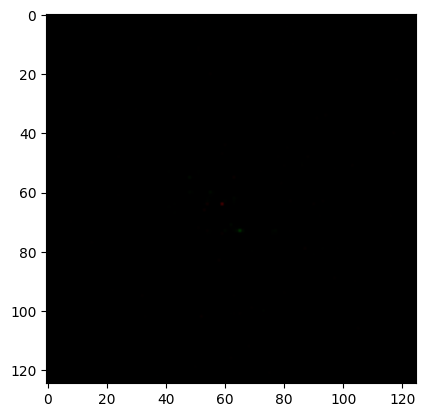

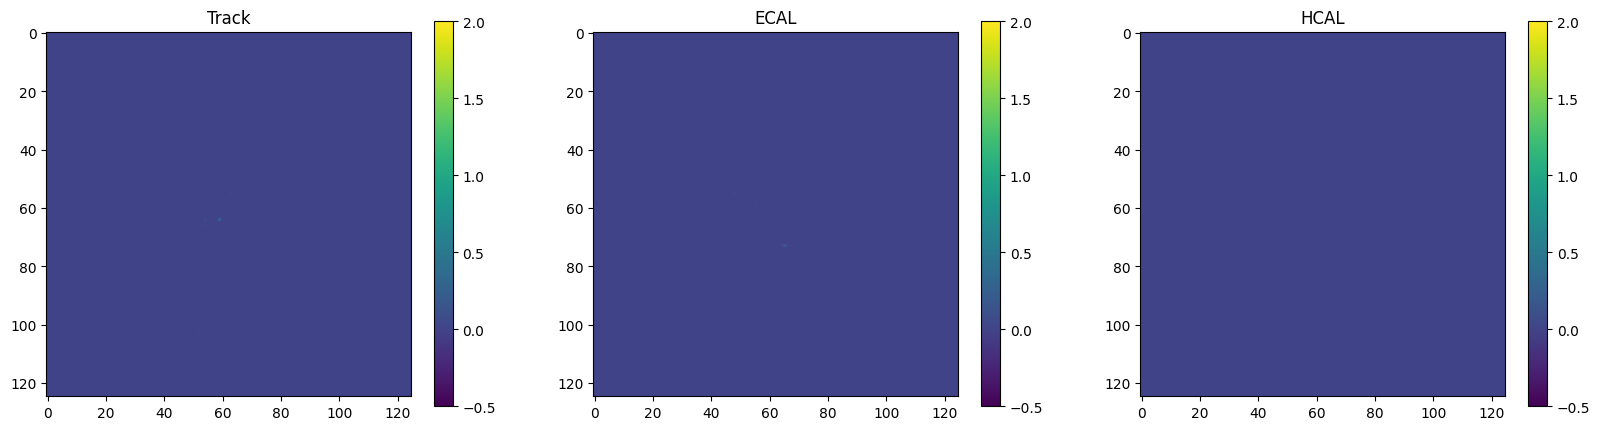

In [7]:
plot_fxn(X)

* The idea behind jet images is to treat the energy deposits in a calorimeter as intensities in a 2D image.
*

In [8]:
from skimage.transform import resize
from sklearn.preprocessing import normalize

def data_preprocess(X_jets):
    #Normalizing the images

    # Resizing images from (125, 125, 3) to (128, 128, 3)
    resized_images = np.zeros((X_jets.shape[0], 128, 128, 3), dtype=np.float32)
    for i in range(X_jets.shape[0]):
        resized_images[i] = resize(X_jets[i], (128, 128), anti_aliasing=True)

    X_jets = resized_images
    del resized_images

    # Normalizing the entire image across all channels
    mean = np.mean(X_jets)
    std = np.std(X_jets)
    X_jets = (X_jets - mean) / std

    # Assuming X_jets is your image array
    X_jets = np.clip(X_jets, 0, None)
    return X_jets

In [9]:
X_jets = data_preprocess(X)

In [10]:
data_info_getter(X_jets, y)

Max value of intensity along 1st channel :  2362.628    Min value :  0.0
Mean intensity value along 1st channel :  0.04981079
Standard Deviation :  1.4279369 


Max value of intensity along 2nd channel :  2024.9122    Min value :  0.0
Mean intensity value along 2nd channel :  0.03096904
Standard Deviation :  0.92825264 


Max value of intensity along 3rd channel :  97.2833    Min value :  0.0
Mean intensity value along 3rd channel :  0.018975094
Standard Deviation :  0.30354062 


Max value of intensity in combined channel image :  3176.8347    Min value :  0.0
Mean intensity value in combined channel :  0.099754974
Standard Deviation :  1.9071484 




Note, in the following plot, we are yet to normalize each image channel-wise.

For the first image in the passed data batch -> 

For the first image among the batch passed : 
Max value of intensity along 1st channel :  52.13446    Min value :  0.0
Max value of intensity along 2nd channel :  59.500538    Min value :  0.0
Max value of intensity along 3rd channel :  2.3792415    Min value :  0.0


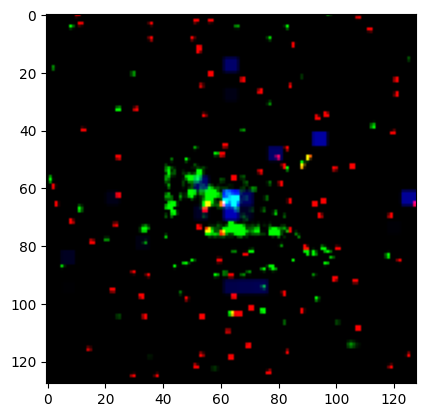

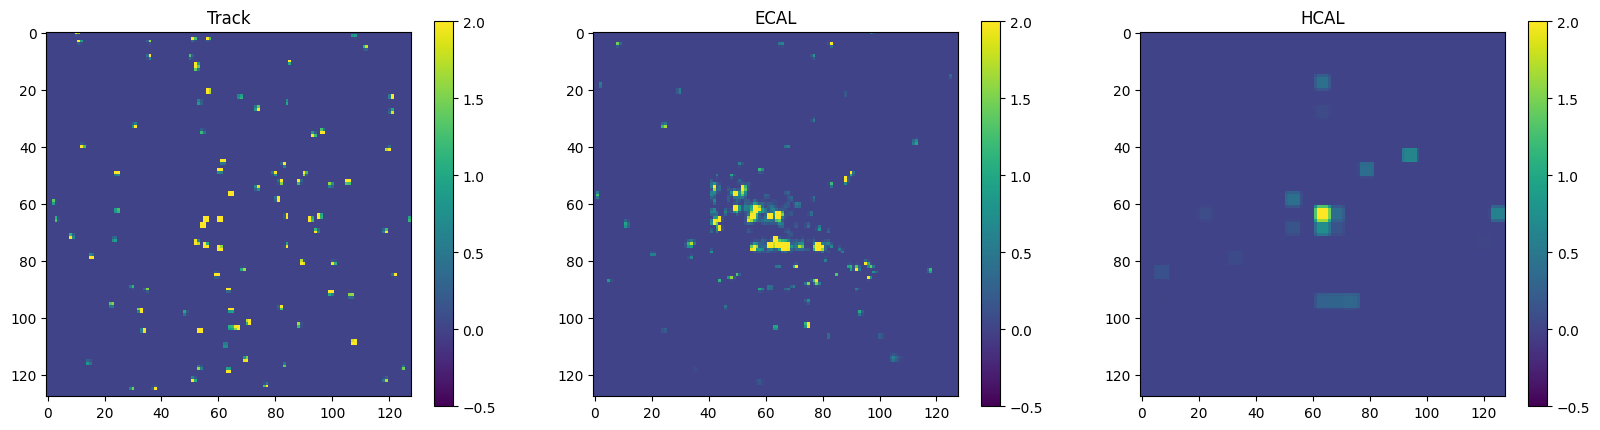

In [11]:
plot_fxn(X_jets)

Relevant data classes are `X_jets` and `y` ->

Loading these datasets using standard PyTorch dataloader ->

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [13]:
from torch.distributions import Normal


class Sampling(nn.Module):
    def forward(self, z_mean, z_log_var):
        # Get the shape of the tensor for the mean and log variance.
        batch, dim = z_mean.shape
        # Generate a normal random tensor (epsilon) with the same shape as z_mean
        # This tensor will be used for reparameterization trick
        epsilon = Normal(0, 1).sample((batch, dim)).to(z_mean.device)
        # Apply the reparameterization trick to generate the samples in the
        # latent space
        return z_mean + torch.exp(0.5 * z_log_var) * epsilon

In [14]:

# Define the Encoder
class Encoder(nn.Module):
    def __init__(self, embedding_dim):
        super(Encoder, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, stride=2, padding=1)
        self.bn4 = nn.BatchNorm2d(512)
        self.sampling = Sampling()
        # Calculate the size of the flattened tensor
        # Assuming the image size is 128x128
        # After the first conv layer: 64x64
        # After the second conv layer: 32x32
        # After the third conv layer: 16x16
        # After the fourth conv layer: 8x8
        # Flattened size: 8*8*512 = 32768
        self.fc_mu = nn.Linear(32768, embedding_dim)
        self.fc_logvar = nn.Linear(32768, embedding_dim)

    def forward(self, x):

#        print(x.shape)
        # Assuming `x` is the input tensor with dimensions (N, H, W, C)
#        x = x.permute(0, 3, 1, 2) # Permute to (N, C, H, W)

        # Apply the convolutional layers with batch normalization
        x = self.bn1(self.conv1(x))
        x = nn.LeakyReLU(0.2)(x)
        x = self.bn2(self.conv2(x))
        x = nn.LeakyReLU(0.2)(x)
        x = self.bn3(self.conv3(x))
        x = nn.LeakyReLU(0.2)(x)
        x = self.bn4(self.conv4(x))
        x = nn.LeakyReLU(0.2)(x)

        # With this line
        x = x.reshape(x.size(0), -1)

        # Apply the fully connected layers to get the mean and log variance
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)

        # Sample a latent vector using reparameterization trick
        z = self.sampling(mu, logvar)

        return mu, logvar, z


# class Encoder(nn.Module):
#     def __init__(self, latent_dim, img_size):
#         super(Encoder, self).__init__()
#
#         self.latent_dim = latent_dim
#         self.img_size = img_size
#         self.channels = 3
#
#         self.conv1 =  nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1)
#         self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
#         self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1)
#     #    self.conv4 = nn.Conv2d(128, 256, kernel_size = 3, stride = 2, padding = 1)
#         self.flatten = nn.Flatten()
#
#         # Parameters for the latent space
#         self.fc_mean = nn.Linear(128 * (img_size//8) * (img_size//8), latent_dim)
#         self.fc_log_var = nn.Linear(128 * (img_size//8) * (img_size//8), latent_dim)
#
#         # Initializing the sampling layer as well,
#         self.sampling = Sampling()
#

In [15]:
# Decoder
import torch.nn.functional as F

import torch
import torch.nn as nn

class Decoder(nn.Module):
    def __init__(self, embedding_dim):
        super(Decoder, self).__init__()

        # Fully connected layer to map the latent vector back to the size of the flattened tensor
        self.fc = nn.Linear(embedding_dim, 32768)

        # Transposed convolutional layers to upscale the tensor
        self.deconv1 = nn.ConvTranspose2d(512, 256, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.bn1 = nn.BatchNorm2d(256)
        self.deconv2 = nn.ConvTranspose2d(256, 128, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.deconv3 = nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.deconv4 = nn.ConvTranspose2d(64, 3, kernel_size=3, stride=2, padding=1, output_padding=1)

        # Final activation function
        self.tanh = nn.Tanh()

    def forward(self, z):
        # Fully connected layer
        x = self.fc(z)
        x = x.view(z.size(0), 512, 8, 8)

        # Transposed convolutional layers
        x = self.bn1(self.deconv1(x))
        x = nn.LeakyReLU(0.2)(x)
        x = self.bn2(self.deconv2(x))
        x = nn.LeakyReLU(0.2)(x)
        x = self.bn3(self.deconv3(x))
        x = nn.LeakyReLU(0.2)(x)
        x = self.deconv4(x)

        # Final activation
        x = (self.tanh(x) + 1)/2.

        return x

#     def forward(self, x):
#         # Pass the latent vector through the fully connected layer
#         x = self.fc(x)
#         # Reshape the tensor
#         x = self.reshape(x)
#         # Apply transposed convolutional layers with relu activation function
# #        x = F.relu(self.deconv1(x))
#         x = F.relu(self.deconv2(x))
#         x = F.relu(self.deconv3(x))
#         # Apply the final transposed convolutional layer with a sigmoid
#         # activation to generate the final output
#         x = 0.5 * (torch.sigmoid(self.deconv4(x)) + 1)
#
#
#         return x

In [16]:
#!pip install pytorch-lightning

In [17]:

#import pytorch_lightning as pl
import torch
import torch.nn as nn
import torch.nn.functional as F

class VAE(nn.Module):
    def __init__(self, embedding_dim):
        super(VAE, self).__init__()
        self.encoder = Encoder(embedding_dim)
        self.decoder = Decoder(embedding_dim)

    def forward(self, x):
        mu, logvar, z = self.encoder(x)
        x_reconstructed = self.decoder(z)
        return x_reconstructed, mu, logvar

    def vae_gaussian_kl_loss(self, mu, logvar):
        KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp(), dim=1)
        return KLD.mean()

    def reconstruction_loss(self, x_reconstructed, x):
        bce_loss = nn.BCELoss()
        return bce_loss(x_reconstructed, x)

    def vae_loss(self, x_reconstructed, x, mu, logvar):
        recon_loss = self.reconstruction_loss(x_reconstructed, x)
        kld_loss = self.vae_gaussian_kl_loss(mu, logvar)
        return 500 * recon_loss + kld_loss


In [18]:
# # Define loss function
# #KL Divergence is computed between the learned latent variable distribution and a standard normal distribution.
# def vae_gaussian_kl_loss(mu, logvar):
#     # see Appendix B from VAE paper:
#     # Kingma and Welling. Auto-Encoding Variational Bayes. ICLR, 2014
#     # https://arxiv.org/abs/1312.6114
#     KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp(), dim=1)
#     return KLD.mean()
#
# def reconstruction_loss(x_reconstructed, x):
#     bce_loss = nn.BCELoss()
#     return bce_loss(x_reconstructed, x)
#
#
# def vae_loss(y_pred, y_true):
#     mu, logvar, recon_x = y_pred
#     recon_loss = reconstruction_loss(recon_x, y_true)
#     kld_loss = vae_gaussian_kl_loss(mu, logvar)
#     return 500 * recon_loss + kld_loss
# # def vae_loss(reconstructed, original, mu, log_var):
# #     reconstruction_loss = F.binary_cross_entropy(reconstructed, original, reduction='sum')
# #     kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
# #     return reconstruction_loss + kl_divergence

In [19]:
trackMax = np.max(X_jets[:,:,:,0])
ecalMax = np.max(X_jets[:,:,:,1])
hcalMax = np.max(X_jets[:,:,:,2])


X_jets[:,:,:,0] = X_jets[:,:,:,0]/trackMax
X_jets[:,:,:,1] = X_jets[:,:,:,1]/ecalMax
X_jets[:,:,:,2] = X_jets[:,:,:,2]/hcalMax

In [20]:
data_info_getter(X_jets, y)

Max value of intensity along 1st channel :  1.0    Min value :  0.0
Mean intensity value along 1st channel :  2.1082873e-05
Standard Deviation :  0.00060438446 


Max value of intensity along 2nd channel :  1.0    Min value :  0.0
Mean intensity value along 2nd channel :  1.5294063e-05
Standard Deviation :  0.00045841653 


Max value of intensity along 3rd channel :  0.041175887    Min value :  0.0
Mean intensity value along 3rd channel :  8.1936e-05
Standard Deviation :  0.0013107107 


Max value of intensity in combined channel image :  1.6550479    Min value :  0.0
Mean intensity value in combined channel :  0.00011831272
Standard Deviation :  0.0016820171 




In [21]:
from sklearn.model_selection import train_test_split

# Assuming X_jets is your dataset and y are the labels
X_jets_train, X_jets_test, y_train, y_test = train_test_split(X_jets, y, test_size=0.3, random_state=42)
X_jets_train, X_jets_val, y_train, y_val = train_test_split(X_jets_train, y_train, test_size=0.25, random_state=42)

In [22]:
import torch
from torch.utils.data import Dataset

class JetDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __getitem__(self, index):
        # X is in the format (h, w, channels)
        # Permute the dimensions to (channels, h, w)
        image = self.X[index].permute(2, 0, 1)
        return image, self.y[index]

    def __len__(self):
        return len(self.X)

# Convert your data to PyTorch tensors
train_dataset = JetDataset(torch.from_numpy(X_jets_train), torch.from_numpy(y_train))
val_dataset = JetDataset(torch.from_numpy(X_jets_val), torch.from_numpy(y_val))
test_dataset = JetDataset(torch.from_numpy(X_jets_test), torch.from_numpy(y_test))

In [23]:
from tqdm import tqdm

In [24]:
torch.cuda.is_available()

True

In [25]:
from torch.utils.data import DataLoader
import torch.optim as optim


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VAE(embedding_dim= 2048).to(device) # Adjust embedding_dim as needed
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = model.vae_loss

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=False)

# Training loop
num_epochs = 40
train_losses = []
val_losses = []

# for epoch in range(num_epochs):
#     model.train()
#     train_loss = 0
#     for batch_idx, (data, _) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch}")):
#         optimizer.zero_grad()
#         recon_batch, mu, logvar = model(data)
#         loss = criterion(recon_batch, data, mu, logvar)
#         loss.backward()
#         train_loss += loss.item()
#         optimizer.step()
#     train_losses.append(train_loss / len(train_loader))

#     model.eval()
#     val_loss = 0
#     with torch.no_grad():
#         for batch_idx, (data, _) in enumerate(val_loader):
#             recon_batch, mu, logvar = model(data)
#             loss = criterion(recon_batch, data, mu, logvar)
#             val_loss += loss.item()
#     val_losses.append(val_loss / len(val_loader))
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch}")):
        data = data.to(device) # Move data to device
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = criterion(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    train_losses.append(train_loss / len(train_loader))

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch_idx, (data, _) in enumerate(val_loader):
            data = data.to(device) # Move data to device
            recon_batch, mu, logvar = model(data)
            loss = criterion(recon_batch, data, mu, logvar)
            val_loss += loss.item()
    val_losses.append(val_loss / len(val_loader))

    print(f'Epoch: {epoch+1}, Train Loss: {train_losses[-1]}, Val Loss: {val_losses[-1]}')

Epoch 0: 100%|██████████| 42/42 [00:12<00:00,  3.28it/s]


Epoch: 1, Train Loss: 4439.530644008091, Val Loss: 719.9940011160714


Epoch 1: 100%|██████████| 42/42 [00:11<00:00,  3.74it/s]


Epoch: 2, Train Loss: 22702.453719366164, Val Loss: 576.0178963797433


Epoch 2: 100%|██████████| 42/42 [00:11<00:00,  3.70it/s]


Epoch: 3, Train Loss: 204076.14492797852, Val Loss: 1055.771715436663


Epoch 3: 100%|██████████| 42/42 [00:11<00:00,  3.67it/s]


Epoch: 4, Train Loss: 539.3965802873884, Val Loss: 585.9612819126675


Epoch 4: 100%|██████████| 42/42 [00:11<00:00,  3.62it/s]


Epoch: 5, Train Loss: 433.08790079752606, Val Loss: 393.3386470249721


Epoch 5: 100%|██████████| 42/42 [00:11<00:00,  3.60it/s]


Epoch: 6, Train Loss: 373.4277176629929, Val Loss: 340.96190098353793


Epoch 6: 100%|██████████| 42/42 [00:11<00:00,  3.58it/s]


Epoch: 7, Train Loss: 328.7742542085193, Val Loss: 304.3622610909598


Epoch 7: 100%|██████████| 42/42 [00:11<00:00,  3.52it/s]


Epoch: 8, Train Loss: 294.24711536225817, Val Loss: 273.57748631068637


Epoch 8: 100%|██████████| 42/42 [00:12<00:00,  3.45it/s]


Epoch: 9, Train Loss: 265.47069295247394, Val Loss: 247.6827850341797


Epoch 9: 100%|██████████| 42/42 [00:12<00:00,  3.36it/s]


Epoch: 10, Train Loss: 240.58736528669084, Val Loss: 225.0811026436942


Epoch 10: 100%|██████████| 42/42 [00:12<00:00,  3.28it/s]


Epoch: 11, Train Loss: 218.71517435709634, Val Loss: 204.8503428867885


Epoch 11: 100%|██████████| 42/42 [00:12<00:00,  3.34it/s]


Epoch: 12, Train Loss: 199.29824284144811, Val Loss: 186.696165902274


Epoch 12: 100%|██████████| 42/42 [00:12<00:00,  3.39it/s]


Epoch: 13, Train Loss: 182.10293324788412, Val Loss: 171.14660862513952


Epoch 13: 100%|██████████| 42/42 [00:12<00:00,  3.43it/s]


Epoch: 14, Train Loss: 166.82345508393786, Val Loss: 156.68687547956193


Epoch 14: 100%|██████████| 42/42 [00:12<00:00,  3.43it/s]


Epoch: 15, Train Loss: 153.30758648826964, Val Loss: 144.09969438825334


Epoch 15: 100%|██████████| 42/42 [00:12<00:00,  3.39it/s]


Epoch: 16, Train Loss: 141.26725387573242, Val Loss: 133.27341079711914


Epoch 16: 100%|██████████| 42/42 [00:12<00:00,  3.37it/s]


Epoch: 17, Train Loss: 130.61690139770508, Val Loss: 123.17455564226422


Epoch 17: 100%|██████████| 42/42 [00:12<00:00,  3.36it/s]


Epoch: 18, Train Loss: 121.12426594325474, Val Loss: 114.7407112121582


Epoch 18: 100%|██████████| 42/42 [00:12<00:00,  3.36it/s]


Epoch: 19, Train Loss: 112.70088540940057, Val Loss: 106.75659452165876


Epoch 19: 100%|██████████| 42/42 [00:12<00:00,  3.36it/s]


Epoch: 20, Train Loss: 105.17432694208054, Val Loss: 99.7947267804827


Epoch 20: 100%|██████████| 42/42 [00:12<00:00,  3.36it/s]


Epoch: 21, Train Loss: 98.5493990580241, Val Loss: 93.68397685459682


Epoch 21: 100%|██████████| 42/42 [00:12<00:00,  3.36it/s]


Epoch: 22, Train Loss: 92.56350035894485, Val Loss: 88.44385583060128


Epoch 22: 100%|██████████| 42/42 [00:12<00:00,  3.36it/s]


Epoch: 23, Train Loss: 87.31759552728562, Val Loss: 83.50619942801339


Epoch 23: 100%|██████████| 42/42 [00:12<00:00,  3.37it/s]


Epoch: 24, Train Loss: 82.58709398905437, Val Loss: 79.33887154715401


Epoch 24: 100%|██████████| 42/42 [00:12<00:00,  3.36it/s]


Epoch: 25, Train Loss: 78.57192784263974, Val Loss: 75.56963457380023


Epoch 25: 100%|██████████| 42/42 [00:12<00:00,  3.36it/s]


Epoch: 26, Train Loss: 74.86621257237026, Val Loss: 72.38235310145787


Epoch 26: 100%|██████████| 42/42 [00:12<00:00,  3.36it/s]


Epoch: 27, Train Loss: 71.69667144048782, Val Loss: 69.33175332205636


Epoch 27: 100%|██████████| 42/42 [00:12<00:00,  3.36it/s]


Epoch: 28, Train Loss: 68.74857757205055, Val Loss: 67.02908842904228


Epoch 28: 100%|██████████| 42/42 [00:12<00:00,  3.36it/s]


Epoch: 29, Train Loss: 66.33416557312012, Val Loss: 64.76595606122699


Epoch 29: 100%|██████████| 42/42 [00:12<00:00,  3.36it/s]


Epoch: 30, Train Loss: 64.02920359656925, Val Loss: 62.85685593741281


Epoch 30: 100%|██████████| 42/42 [00:12<00:00,  3.36it/s]


Epoch: 31, Train Loss: 62.286855334327335, Val Loss: 61.314095633370535


Epoch 31: 100%|██████████| 42/42 [00:12<00:00,  3.36it/s]


Epoch: 32, Train Loss: 60.59928975786482, Val Loss: 59.944043023245676


Epoch 32: 100%|██████████| 42/42 [00:12<00:00,  3.37it/s]


Epoch: 33, Train Loss: 59.34312947591146, Val Loss: 58.838941301618306


Epoch 33: 100%|██████████| 42/42 [00:12<00:00,  3.36it/s]


Epoch: 34, Train Loss: 57.97714160737537, Val Loss: 57.78308541434152


Epoch 34: 100%|██████████| 42/42 [00:12<00:00,  3.36it/s]


Epoch: 35, Train Loss: 57.00199835641043, Val Loss: 56.91722433907645


Epoch 35: 100%|██████████| 42/42 [00:12<00:00,  3.37it/s]


Epoch: 36, Train Loss: 55.96303376697359, Val Loss: 56.10402924673898


Epoch 36: 100%|██████████| 42/42 [00:12<00:00,  3.37it/s]


Epoch: 37, Train Loss: 55.22399729774112, Val Loss: 55.18941170828683


Epoch 37: 100%|██████████| 42/42 [00:12<00:00,  3.36it/s]


Epoch: 38, Train Loss: 54.102869124639604, Val Loss: 53.98286492483957


Epoch 38: 100%|██████████| 42/42 [00:12<00:00,  3.36it/s]


Epoch: 39, Train Loss: 53.11695316859654, Val Loss: 53.016864504132954


Epoch 39: 100%|██████████| 42/42 [00:12<00:00,  3.36it/s]


Epoch: 40, Train Loss: 51.95327168419247, Val Loss: 51.768834250313894


For the first image in the passed data batch -> 

For the first image among the batch passed : 
Max value of intensity along 1st channel :  5.626907    Min value :  0.0
Max value of intensity along 2nd channel :  7.4929852    Min value :  0.0
Max value of intensity along 3rd channel :  2.6198044    Min value :  0.0


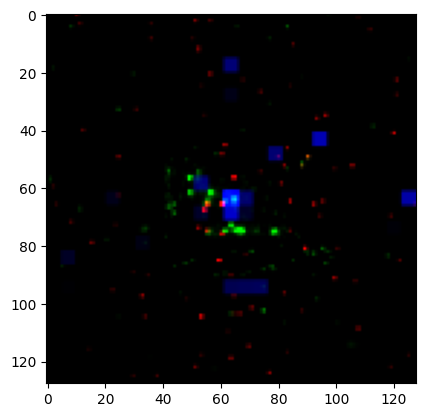

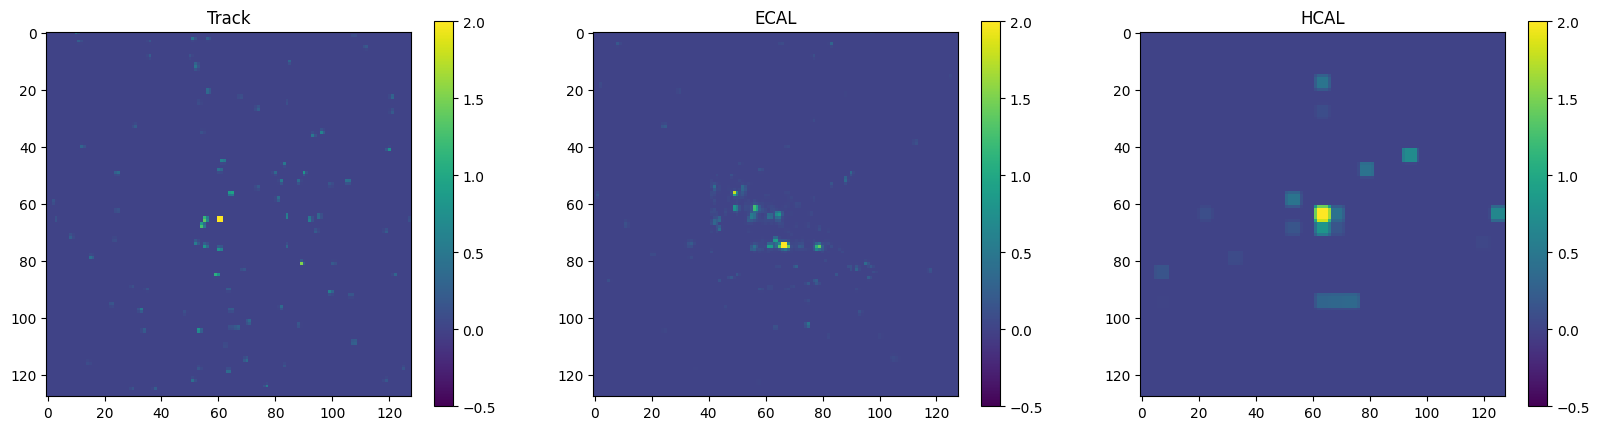

In [26]:
plot_fxn(X_jets*255.)

In [76]:
def reconstruct_image(original_image, model):
    # Ensure the image is a PyTorch tensor and on the correct device
    original_image = torch.from_numpy(original_image).float().to(device)
    # Reshape the image to match the input shape expected by the model
    original_image = original_image.unsqueeze(0) # Assuming the model expects a batch of images

    # Pass the image through the model to get the reconstructed image
    with torch.no_grad():
        reconstructed_image = model(original_image)

    # Convert the reconstructed image back to a NumPy array
    reconstructed_image = reconstructed_image[0]
    reconstructed_image = reconstructed_image.squeeze(0)
#    print(reconstructed_image.shape)
    reconstructed_image = reconstructed_image.cpu().numpy().astype(np.float32)

    reconstructed_image = np.transpose(reconstructed_image, (1, 2, 0))
#    print(reconstructed_image.shape)
    # # Reshape the reconstructed image to its original shape (128x128 for our case)
    # reconstructed_image = reconstructed_image.reshape(128, 128)

    return reconstructed_image

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# # Now that the model is trained, and we have already loaded a  DataLoader for the test data.
# test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming the model is trained and you have a DataLoader for test data
# #test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# # Get a single image from the test dataset
# dataiter = iter(test_loader)
# images, _ = next(dataiter)
images = X_jets[0]

# Plot original image
# plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.imshow(images * 255.)
# plt.title('Original Image')
# plt.axis('off')

images = np.transpose(images, (2, 0, 1))
#images.to(device)
reconstructed_image = reconstruct_image(images, model)

#reconstructed_image = np.clip(reconstructed_image, 0, None)
# Scale the reconstructed image by 255.0 and convert to numpy
reconstructed_image_scaled = reconstructed_image


For the first image among the batch passed : 
Max value of intensity along 1st channel :  0.0220663    Min value :  0.0
Max value of intensity along 2nd channel :  0.029384255    Min value :  0.0
Max value of intensity along 3rd channel :  0.0102737425    Min value :  0.0


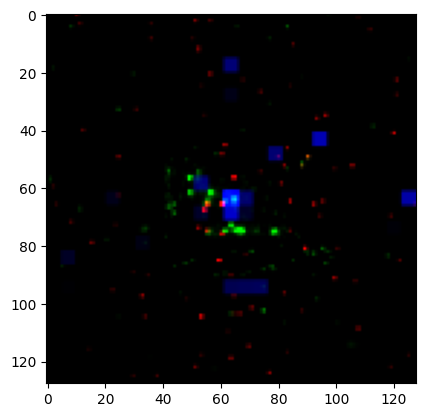

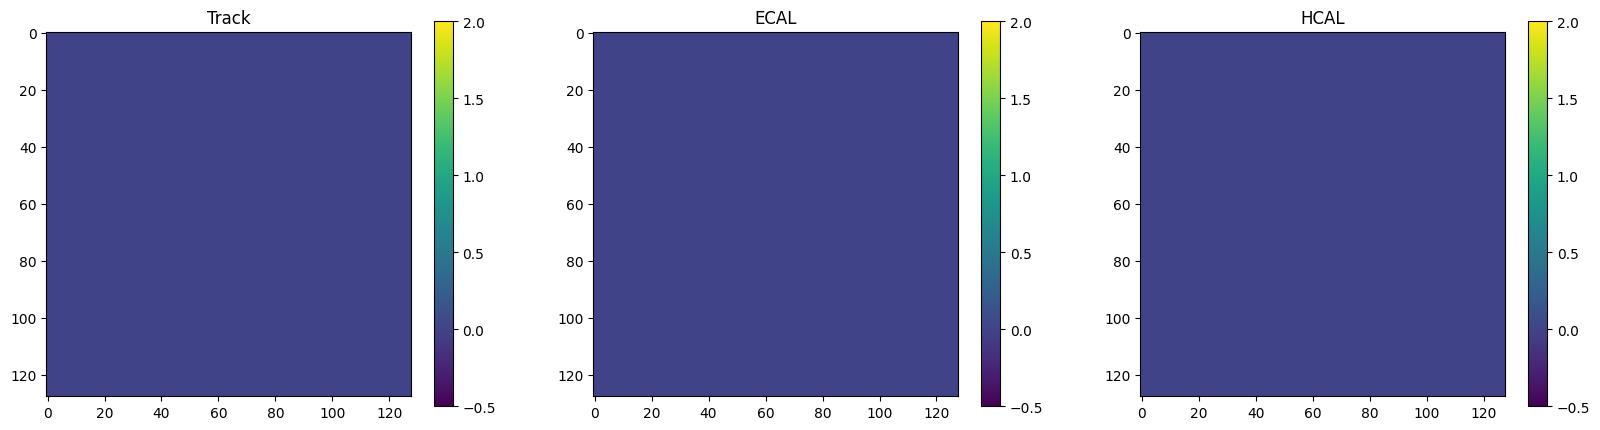

In [83]:
X_sample = X_jets[0]
#X_sample = (X_sample - np.min(X_sample)) / (np.max(X_sample) - np.min(X_sample))
print("For the first image among the batch passed : ")
print("Max value of intensity along 1st channel : ", np.max(X_sample[:,:,0]), "   Min value : ", np.min(X_sample[:,:,0]))
print("Max value of intensity along 2nd channel : ", np.max(X_sample[:,:,1]), "   Min value : ", np.min(X_sample[:,:,1]))
print("Max value of intensity along 3rd channel : ", np.max(X_sample[:,:,2]), "   Min value : ", np.min(X_sample[:,:,2]))
og_plot = plt.imshow(X_sample* 255.)


fig, axs = plt.subplots(1, 3, figsize=(20, 20))

im1 = axs[0].imshow(X_sample[:,:,0], cmap='viridis', vmin=-0.5, vmax=2.0, interpolation='nearest')
axs[0].set_title('Track')

im2 = axs[1].imshow(X_sample[:, :, 1], cmap='viridis', vmin=-0.5, vmax=2.0, interpolation='nearest')
axs[1].set_title('ECAL')

im3 = axs[2].imshow(X_sample[:, :,2], cmap='viridis', vmin=-0.5, vmax=2.0, interpolation='nearest')
axs[2].set_title('HCAL')

# Add colorbars
fig.colorbar(im1, ax=axs[0], shrink=0.25)
fig.colorbar(im2, ax=axs[1], shrink=0.25)
fig.colorbar(im3, ax=axs[2], shrink=0.25)


In [79]:
recon_img = reconstructed_image_scaled
recon_img = (recon_img - np.min(recon_img))/(np.max(recon_img) - np.min(recon_img))

For the first image among the batch passed : 
Max value of intensity along 1st channel :  0.8564974    Min value :  0.0
Max value of intensity along 2nd channel :  0.9801772    Min value :  0.00061798736
Max value of intensity along 3rd channel :  1.0    Min value :  0.0009114682


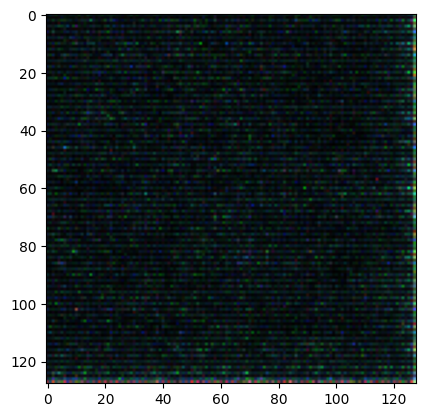

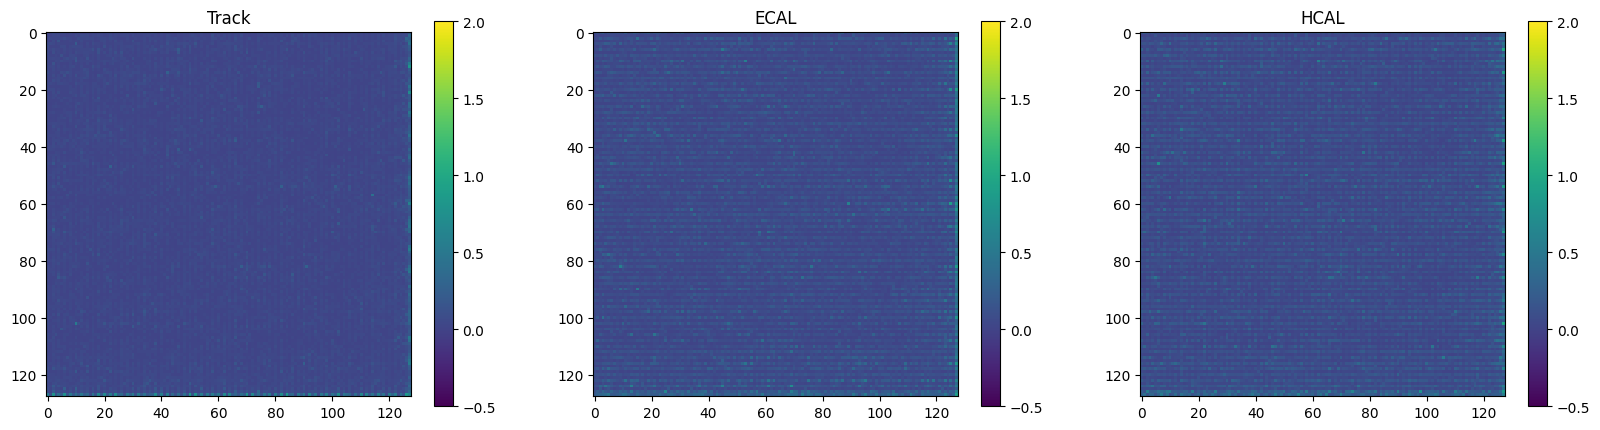

In [81]:
X_sample = recon_img
print("For the first image among the batch passed : ")
print("Max value of intensity along 1st channel : ", np.max(X_sample[:,:,0]), "   Min value : ", np.min(X_sample[:,:,0]))
print("Max value of intensity along 2nd channel : ", np.max(X_sample[:,:,1]), "   Min value : ", np.min(X_sample[:,:,1]))
print("Max value of intensity along 3rd channel : ", np.max(X_sample[:,:,2]), "   Min value : ", np.min(X_sample[:,:,2]))
og_plot = plt.imshow(X_sample)


fig, axs = plt.subplots(1, 3, figsize=(20, 20))

im1 = axs[0].imshow(X_sample[:,:,0], cmap='viridis', vmin=-0.5, vmax=2.0, interpolation='nearest')
axs[0].set_title('Track')

im2 = axs[1].imshow(X_sample[:, :, 1], cmap='viridis', vmin=-0.5, vmax=2.0, interpolation='nearest')
axs[1].set_title('ECAL')

im3 = axs[2].imshow(X_sample[:, :,2], cmap='viridis', vmin=-0.5, vmax=2.0, interpolation='nearest')
axs[2].set_title('HCAL')

# Add colorbars
fig.colorbar(im1, ax=axs[0], shrink=0.25)
fig.colorbar(im2, ax=axs[1], shrink=0.25)
fig.colorbar(im3, ax=axs[2], shrink=0.25)

In [29]:
def compute_test_loss(model, test_loader, criterion):
    model.eval() # Set the model to evaluation mode
    test_loss = 0
    with torch.no_grad(): # Disable gradient computation for efficiency
        for data, _ in test_loader:
            recon_batch, mu, logvar = model(data)
            loss = criterion(recon_batch, data, mu, logvar)
            test_loss += loss.item()
    test_loss /= len(test_loader) # Average the loss over all batches
    return test_loss

# Assuming `model` is your trained VAE model, `test_loader` is your DataLoader for the test dataset,
# and `criterion` is the loss function (e.g., `vae_loss`)
test_loss = compute_test_loss(model, test_loader, criterion)
print(f"Test Loss: {test_loss}")


NameError: name 'test_loader' is not defined

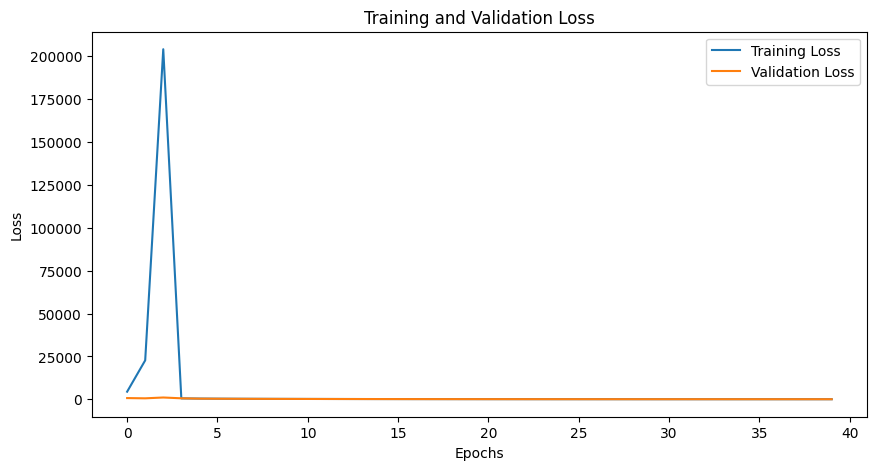

In [84]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(test_loss, label='Test Loss')
plt.title('Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()